In [1]:
import jax
import jax.numpy as jnp
import seaborn as sns
import matplotlib.pyplot as plt

try:
    from probml_utils import latexify, savefig, is_latexify_enabled
except ModuleNotFoundError:
    %pip install git+https://github.com/probml/probml-utils.git
    from probml_utils import latexify, savefig, is_latexify_enabled

try:
    import tinygp
except ModuleNotFoundError:
    %pip install -qqq tinygp
    import tinygp

kernels = tinygp.kernels
from tinygp import GaussianProcess

print("finished installation")

finished installation


In [2]:
latexify(width_scale_factor=4, height_scale_factor=1.5 / 2)

/home/patel_zeel/miniconda3/lib/python3.9/site-packages/probml_utils/plotting.py:26: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


creating  kernel_sum_lin_per.pdf
saving to  kernel_sum_lin_per.pdf
creating  kernel_sum_se_per.pdf


/home/patel_zeel/miniconda3/lib/python3.9/site-packages/probml_utils/plotting.py:79: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


saving to  kernel_sum_se_per.pdf
creating  kernel_sum_lin_se.pdf


/home/patel_zeel/miniconda3/lib/python3.9/site-packages/probml_utils/plotting.py:79: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


saving to  kernel_sum_lin_se.pdf
creating  kernel_sum_se_se.pdf


/home/patel_zeel/miniconda3/lib/python3.9/site-packages/probml_utils/plotting.py:79: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


saving to  kernel_sum_se_se.pdf


/home/patel_zeel/miniconda3/lib/python3.9/site-packages/probml_utils/plotting.py:79: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


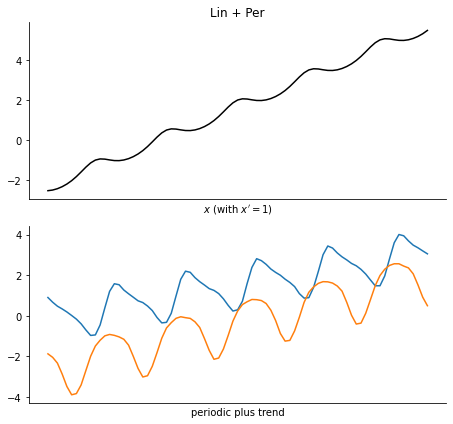

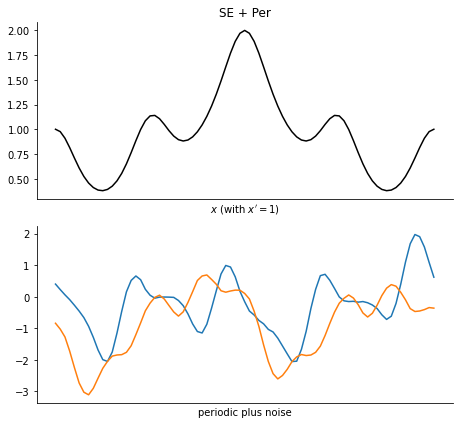

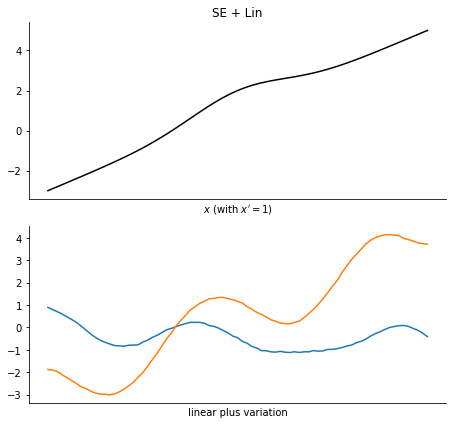

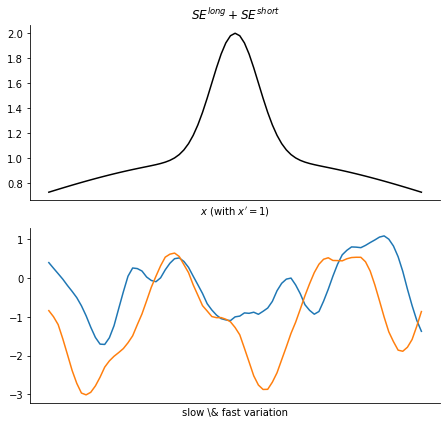

In [3]:
def plot_sample(data, save_name):
    print("creating ", save_name)
    if is_latexify_enabled():
        fig, ax = plt.subplots(2, 1)
    else:
        fig, ax = plt.subplots(2, 1, figsize=(6.4, 6))

    # Plot kernel
    kernel = data["kernel1"] + data["kernel2"]
    x2 = jnp.array([1.0]).reshape(-1, 1)
    kernel_values = kernel(x, x2)
    ax[0].plot(x.ravel(), kernel_values.ravel(), color="k")

    # Plot samples
    gp = GaussianProcess(kernel, x)
    samples = gp.sample(key, (2,))
    for sample in samples:
        ax[1].plot(x, sample)
    ax[0].set_title(data["title"])
    ax[1].set_xlabel(data["xlabel"])
    for axes in ax:
        axes.set_xticks([])
    ax[0].set_xlabel("$x$ (with $x'=1$)")
    plt.tight_layout()
    sns.despine()
    if len(save_name) > 0:
        print("saving to ", save_name)
        savefig(save_name)
    return fig, ax


x = jnp.arange(-3.0, 5.1, 0.1).reshape(-1, 1)
N = len(x)

key = jax.random.PRNGKey(4)

fig, ax = plot_sample(
    {
        "kernel1": kernels.Polynomial(order=1),
        "kernel2": kernels.ExpSineSquared(scale=1.5, gamma=1.0),
        "title": "Lin + Per",
        "xlabel": "periodic plus trend",
    },
    save_name="kernel_sum_lin_per.pdf",
)

fig, ax = plot_sample(
    {
        "kernel1": kernels.ExpSquared(scale=1.0),
        "kernel2": kernels.ExpSineSquared(scale=2.0, gamma=1.0),
        "title": "SE + Per",
        "xlabel": "periodic plus noise",
    },
    save_name="kernel_sum_se_per.pdf",
)

fig, ax = plot_sample(
    {
        "kernel1": kernels.ExpSquared(scale=1.0),
        "kernel2": kernels.Polynomial(order=1),
        "title": "SE + Lin",
        "xlabel": "linear plus variation",
    },
    save_name="kernel_sum_lin_se.pdf",
)

fig, ax = plot_sample(
    {
        "kernel1": kernels.ExpSquared(scale=5.0),
        "kernel2": kernels.ExpSquared(scale=0.5),
        "title": "$SE^{long} + SE^{short}$",
        "xlabel": "slow \& fast variation",
    },
    save_name="kernel_sum_se_se.pdf",
)